![irl](https://www.jobvacancyresult.com/storage/company/1976_innomatics.png)

# Experiment Tracking with `MLFlow` on Diamond Dataset

## Name: Mohammad Wasiq

## E-mail: `mohammadwasiq0786@gmail.com`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/diamonds.csv')

In [4]:
df.shape

(53940, 10)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Rearranging Columns

In [10]:
df2 = df.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

In [11]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [12]:
df2.shape

(53940, 10)

### Checking for Outliers

In [13]:
col_name = df2.select_dtypes(include=['int','float']).columns


for i in col_name:
  mean = df2[i].mean()
  med =  df2[i].median()
  print(f'Mean for {i} is {mean}')
  print(f'Median for {i} is {med}')

Mean for carat is 0.7979397478680014
Median for carat is 0.7
Mean for depth is 61.749404894327036
Median for depth is 61.8
Mean for table is 57.45718390804598
Median for table is 57.0
Mean for x is 5.731157211716722
Median for x is 5.7
Mean for y is 5.734525954764553
Median for y is 5.71
Mean for z is 3.5387337782721544
Median for z is 3.53
Mean for price is 3932.799721913237
Median for price is 2401.0


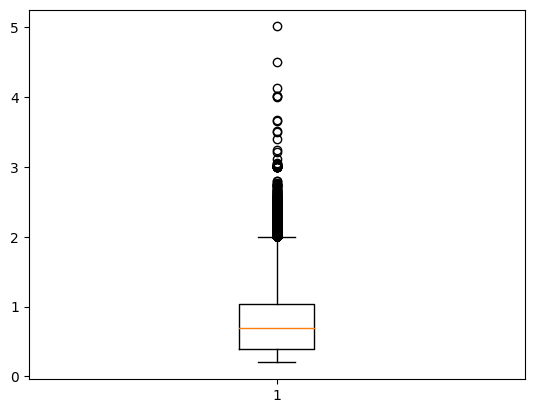

In [14]:
# before removing outliers
plt.boxplot(df2.carat)
plt.show()

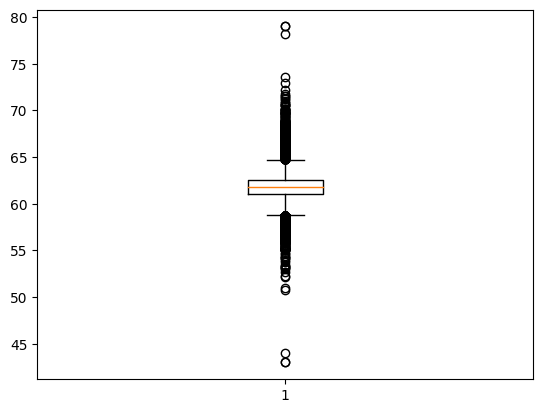

In [15]:
plt.boxplot(df2.depth)
plt.show()

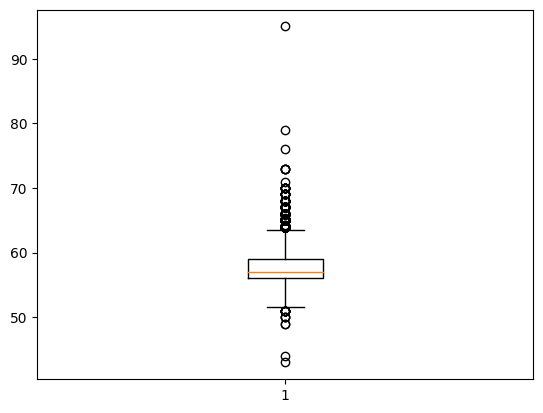

In [16]:
plt.boxplot(df2.table)
plt.show()

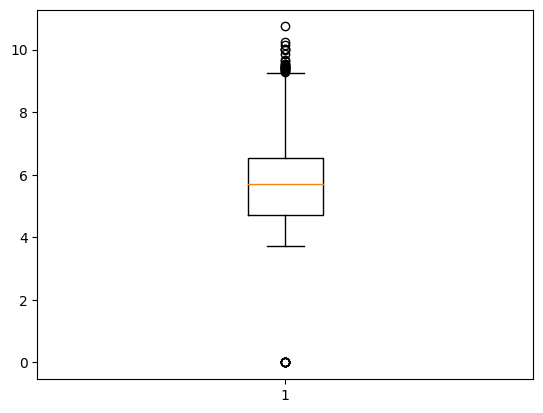

In [17]:
plt.boxplot(df2.x)
plt.show()

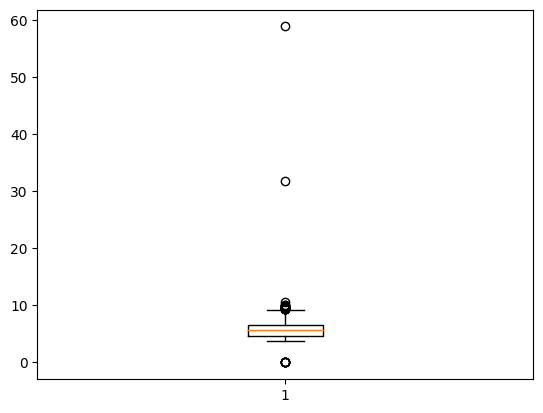

In [18]:
plt.boxplot(df2.y)
plt.show()

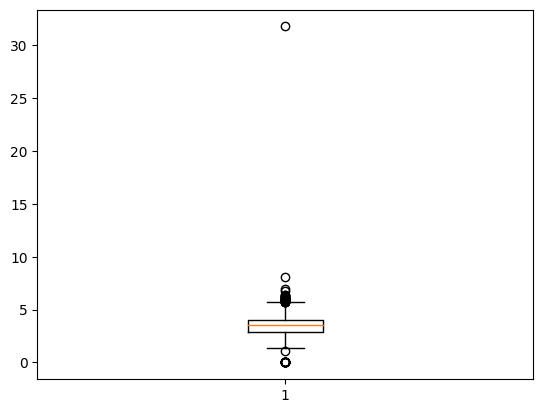

In [19]:
plt.boxplot(df2.z)
plt.show()

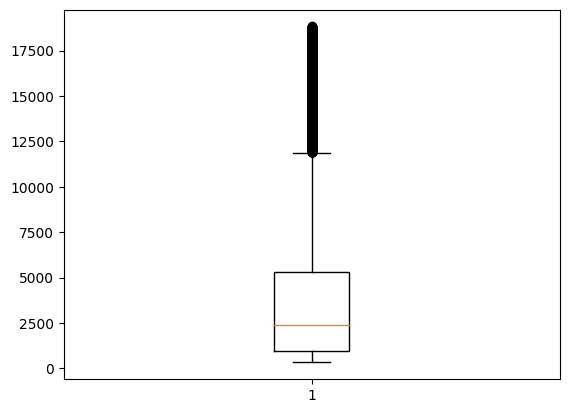

In [20]:
# after removing outliers
plt.boxplot(df2.price)
plt.show()

In [21]:
df2.shape

(53940, 10)

### Treating Outliers

In [22]:
def outliers(col_name):
  Q1 = np.percentile(df2[col_name], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(df2[col_name], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1

  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)

  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True)

In [23]:
outliers('carat')

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

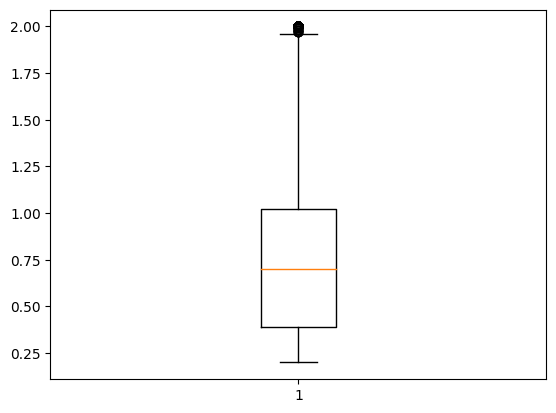

In [24]:
plt.boxplot(df2.carat)
plt.show()

In [25]:
df2.shape

(52051, 10)

In [26]:
outliers('depth')

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

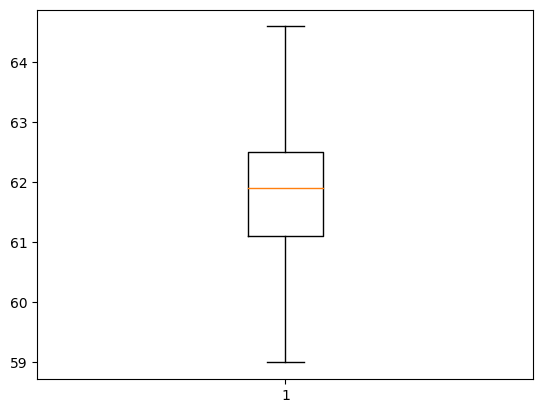

In [27]:
plt.boxplot(df2.depth)
plt.show()

In [28]:
outliers('table')

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

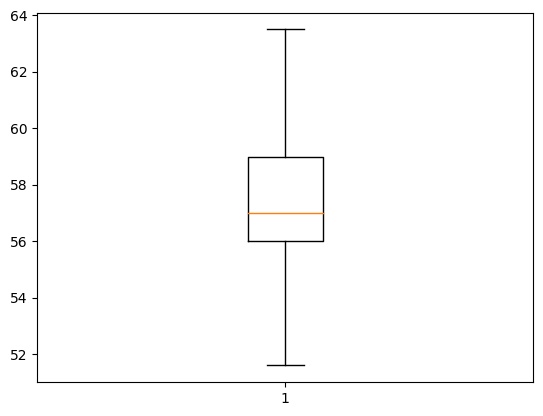

In [29]:
plt.boxplot(df2.table)
plt.show()

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

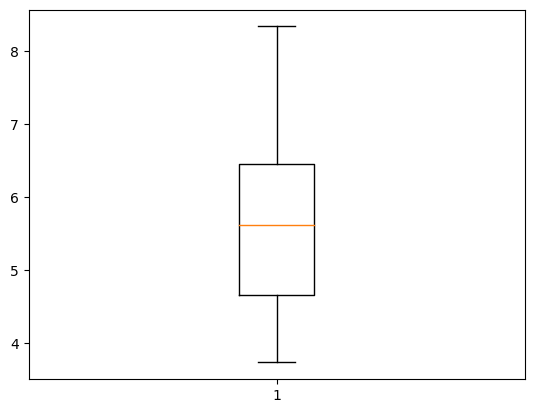

In [30]:
outliers('x')
plt.boxplot(df2.x)
plt.show()

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

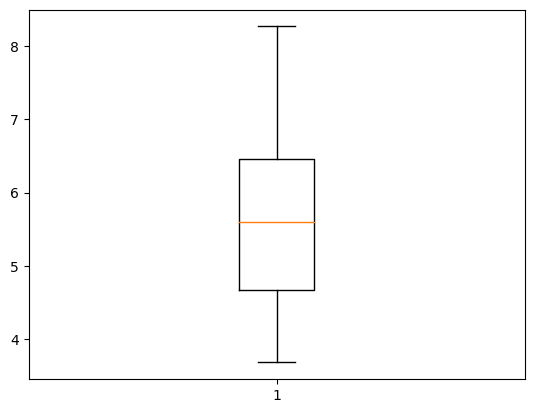

In [31]:
outliers('y')
plt.boxplot(df2.y)
plt.show()

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

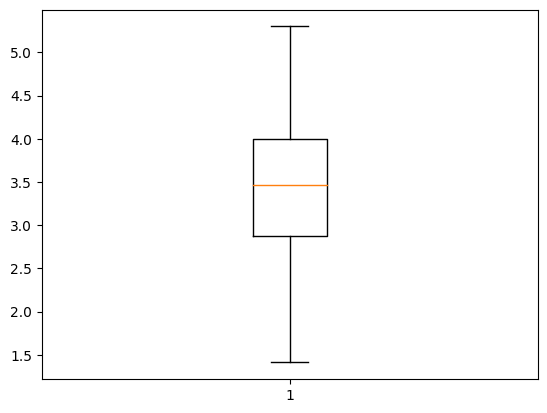

In [32]:
outliers('z')
plt.boxplot(df2.z)
plt.show()

<ipython-input-22-feb8428f4f0e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-22-feb8428f4f0e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-22-feb8428f4f0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True

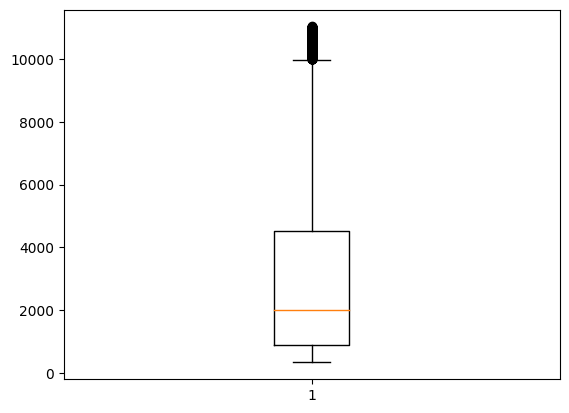

In [33]:
outliers('price')
plt.boxplot(df2.price)
plt.show()

In [34]:
df2.shape

(46530, 10)

In [35]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


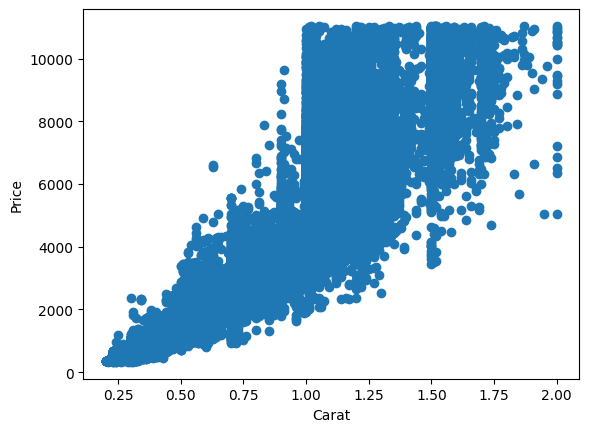

In [36]:
plt.scatter(df2['carat'],df2['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

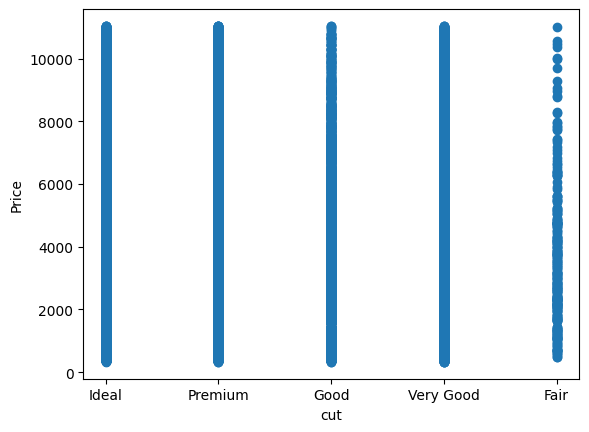

In [37]:
plt.scatter(df2['cut'],df2['price'])
plt.xlabel('cut')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='carat', ylabel='Count'>

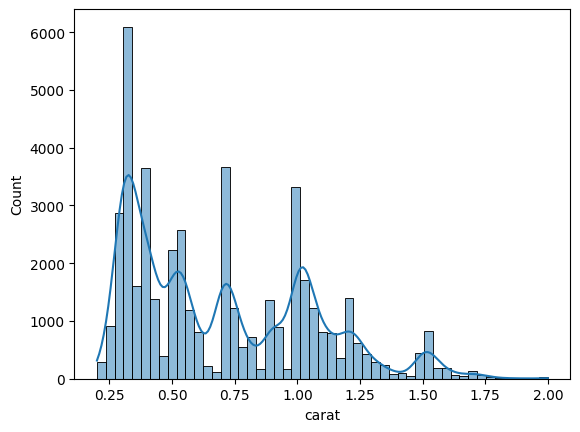

In [38]:
sns.histplot(data=df2['carat'],kde=True)

<Axes: xlabel='cut', ylabel='Count'>

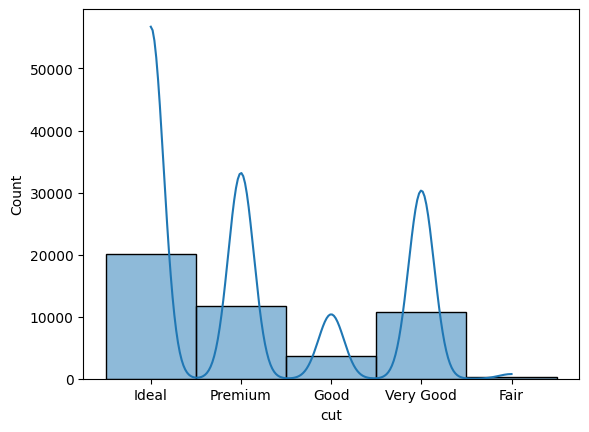

In [39]:
sns.histplot(data=df2['cut'],kde=True)

In [40]:
col_name

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

<Axes: xlabel='table', ylabel='Count'>

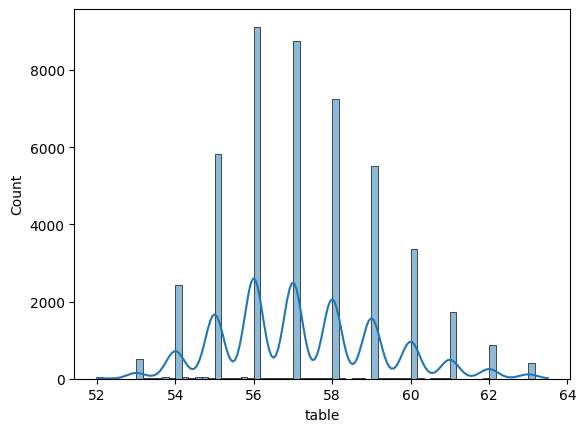

In [41]:
sns.histplot(data=df2['table'],kde=True)

<Axes: xlabel='x', ylabel='Count'>

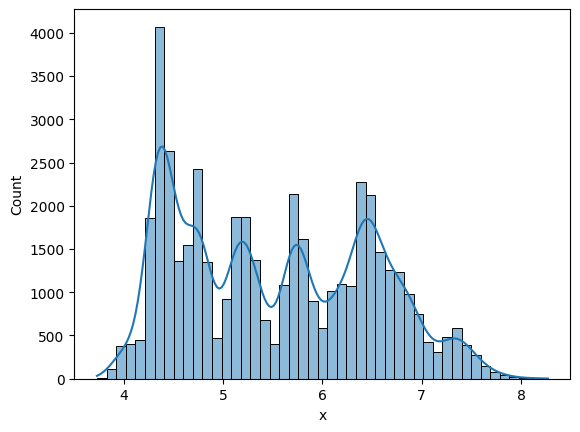

In [42]:
sns.histplot(data=df2['x'],kde=True)

<Axes: xlabel='y', ylabel='Count'>

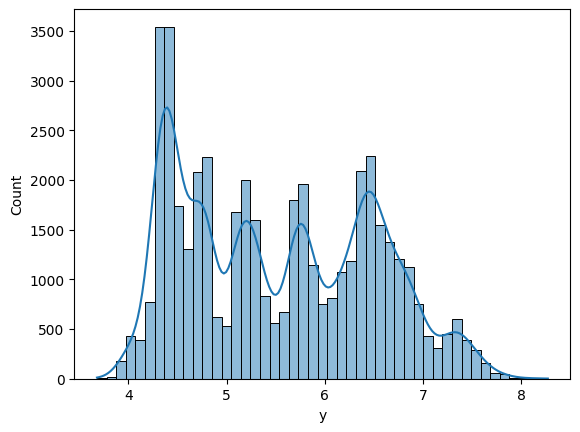

In [43]:
sns.histplot(data=df2['y'],kde=True)

<Axes: xlabel='z', ylabel='Count'>

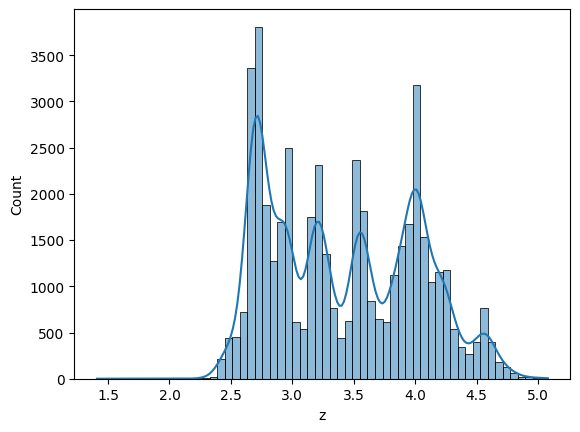

In [44]:
sns.histplot(data=df2['z'],kde=True)

<Axes: xlabel='price', ylabel='Count'>

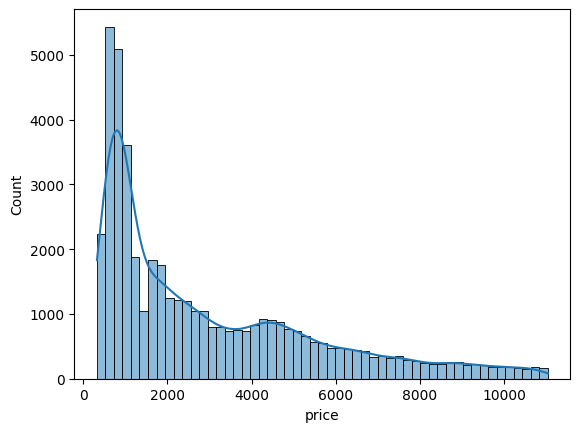

In [45]:
sns.histplot(data=df2['price'],kde=True)

<ipython-input-46-8f16fbc653b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.iloc[:,:].corr(),annot=True)


<Axes: >

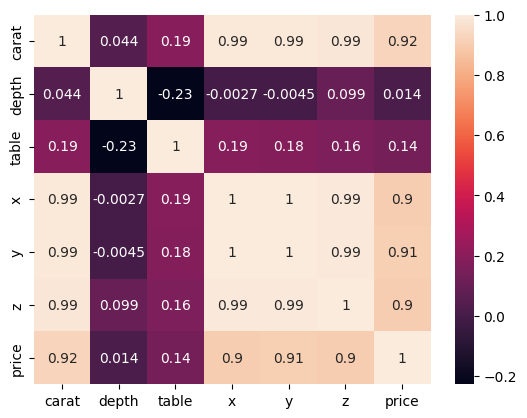

In [46]:
sns.heatmap(df2.iloc[:,:].corr(),annot=True)

We Can see Price column have strong corelation with carat,x,y and z columns.

In [47]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [48]:
df2.price.max()

11039

In [49]:
df2.describe()

,carat,depth,table,x,y,z,price
count,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000
mean,0.697936,61.804300,57.238695,5.521271,5.526300,3.413812,2998.654481
std,0.362002,1.077364,2.013849,0.964439,0.958606,0.597191,2598.175430
min,0.200000,59.000000,52.000000,3.730000,3.680000,1.410000,326.000000
25%,0.370000,61.200000,56.000000,4.620000,4.630000,2.850000,880.000000
50%,0.590000,61.900000,57.000000,5.390000,5.400000,3.325000,2002.000000
75%,1.010000,62.500000,59.000000,6.390000,6.390000,3.960000,4522.000000
max,2.000000,64.600000,63.500000,8.270000,8.270000,5.080000,11039.000000


# KNN Algorithm from Scratch

###Splitting Data into Train Test

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [52]:
X = df2.iloc[:,:9]

In [53]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [54]:
y = df2['price']

In [55]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46530, dtype: int64

In [56]:
X.shape

(46530, 9)

In [57]:
y.shape

(46530,)

### Spliting Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((34897, 9), (11633, 9), (34897,), (11633,))

In [60]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
43090,Premium,G,VS2
18730,Ideal,H,VVS2
51045,Very Good,G,SI1
51968,Ideal,H,IF
10665,Premium,J,SI1


### Ordinal Encoder for categorical features


In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [62]:
X_train_catg = pd.DataFrame(enc.fit_transform(X_train_cat), 
                                    columns = X_train_cat.columns, 
                                    index = X_train_cat.index)
X_train_catg

,cut,color,clarity
43090,3.0,3.0,5.0
18730,2.0,4.0,7.0
51045,4.0,3.0,2.0
51968,2.0,4.0,1.0
10665,3.0,6.0,2.0
...,...,...,...
44493,2.0,4.0,4.0
14342,2.0,5.0,2.0
1566,2.0,5.0,4.0
4757,3.0,0.0,2.0


In [63]:
X_train_catg.isnull().sum()

cut        0
color      0
clarity    0
dtype: int64

In [64]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
43090,0.51,61.1,58.0,5.17,5.20,3.17
18730,1.19,61.6,56.0,6.78,6.86,4.20
51045,0.73,59.8,61.0,5.83,5.85,3.49
51968,0.26,62.1,55.0,4.09,4.13,2.55
10665,1.20,61.4,59.0,6.87,6.82,4.20


### Standard scaler for Numerical Columns

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_no = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

### Concantenating Dataframe/Columns

In [66]:
X_train_rescaled = pd.concat([X_train_catg,X_train_no], axis=1)

X_train_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
43090,3.0,3.0,5.0,-0.525320,-0.644468,0.375270,-0.371514,-0.347900,-0.414841
18730,2.0,4.0,7.0,1.348403,-0.181837,-0.616922,1.295711,1.381758,1.307338
51045,4.0,3.0,2.0,0.080884,-1.847311,1.863557,0.311944,0.329376,0.120204
51968,2.0,4.0,1.0,-1.214189,0.280795,-1.113017,-1.489901,-1.462800,-1.451493
10665,3.0,6.0,2.0,1.375958,-0.366889,0.871365,1.388910,1.340079,1.307338


### Preparing Test Data

In [67]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
15935,Ideal,I,SI1
10395,Ideal,G,SI1
40876,Ideal,E,VVS1
50353,Premium,I,VS2
29761,Premium,I,VS1


In [68]:
X_test_catg = pd.DataFrame(enc.transform(X_test_cat), 
                                    columns = X_test_cat.columns, 
                                    index = X_test_cat.index)

In [69]:
X_test_catg.head()

,cut,color,clarity
15935,2.0,5.0,2.0
10395,2.0,3.0,2.0
40876,2.0,1.0,6.0
50353,3.0,5.0,5.0
29761,3.0,5.0,4.0


In [70]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
15935,1.29,61.9,56.0,6.97,7.03,4.33
10395,0.31,62.2,55.0,4.36,4.35,2.71
40876,0.42,61.8,56.0,4.81,4.83,2.98
50353,0.73,59.7,59.0,5.81,5.94,3.51
29761,0.35,61.1,60.0,4.58,4.52,2.78


In [71]:
X_test_no = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_no.head()

,carat,depth,table,x,y,z
15935,1.623950,0.095743,-0.616922,1.492464,1.558892,1.524700
10395,-1.076415,0.373322,-1.113017,-1.210305,-1.233568,-1.183970
40876,-0.773313,0.003216,-0.616922,-0.744310,-0.733426,-0.732525
50353,0.080884,-1.939837,0.871365,0.291234,0.423152,0.153645
29761,-0.966196,-0.644468,1.367461,-0.982485,-1.056435,-1.066929


### Concatenating Test Dataframe

In [72]:
X_test_rescaled = pd.concat([X_test_catg,X_test_no], axis=1)

X_test_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
15935,2.0,5.0,2.0,1.623950,0.095743,-0.616922,1.492464,1.558892,1.524700
10395,2.0,3.0,2.0,-1.076415,0.373322,-1.113017,-1.210305,-1.233568,-1.183970
40876,2.0,1.0,6.0,-0.773313,0.003216,-0.616922,-0.744310,-0.733426,-0.732525
50353,3.0,5.0,5.0,0.080884,-1.939837,0.871365,0.291234,0.423152,0.153645
29761,3.0,5.0,4.0,-0.966196,-0.644468,1.367461,-0.982485,-1.056435,-1.066929


### Model Training

In [74]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.6-py3-none-any.whl size=143237 sha256=0568b3731106b352ecdc25197a767039c3df6ee2a73259f30a0fd3fc4025b8c3
  Stored in directory: /root/.cache/pip/wheels/

In [75]:
import mlflow

In [76]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Prediction of Diamond Price")

2023/05/07 08:19:29 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/05/07 08:19:29 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/content/mlruns/1', creation_time=1683447570738, experiment_id='1', last_update_time=1683447570738, lifecycle_stage='active', name='Prediction of Diamond Price', tags={}>

In [77]:
from sklearn import metrics

In [78]:
from pickle import dump

In [80]:
from pickle import dump

dump(scaler, open('pickle_files/standard_scaler.pkl', 'wb'))

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

with mlflow.start_run():
    mlflow.set_tag('dev', 'wasiq')
    mlflow.set_tag('algo', 'Random Forest')
    mlflow.log_param('data-path', 'data/diamonds.csv')
    
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train_rescaled, y_train)
    
    y_test_pred = rf_regressor.predict(X_test_rescaled)
    
#     acc = metrics.accuracy_score(y_test, y_test_pred)
#     mlflow.log_metric('accuracy', acc)
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(rf_regressor, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scaler.pkl')

In [82]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  186.97618020641877
Mean Squared Error:  119298.01030628305
Root Mean Squared Error:  345.3954404827647


## Decision Tree Regression

In [83]:
from sklearn.tree import DecisionTreeRegressor

with mlflow.start_run():
    mlflow.set_tag('dev', 'wasiq')
    mlflow.set_tag('algo', 'Decision Tree')
    mlflow.log_param('data-path', 'data/diamonds.csv')

    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train_rescaled, y_train)

    y_test_pred = dt_regressor.predict(X_test_rescaled)
    
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(dt_regressor, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scaler.pkl')

In [84]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  252.96832287458093
Mean Squared Error:  222761.3584415026
Root Mean Squared Error:  471.97601468877906


## Gradient Boosting Regression

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

with mlflow.start_run():
    mlflow.set_tag('dev', 'wasiq')
    mlflow.set_tag('algo', 'Gradient Boosting')
    mlflow.log_param('data-path', 'data/diamonds.csv')

    gbr_regressor = GradientBoostingRegressor()
    gbr_regressor.fit(X_train_rescaled, y_train)
    
    y_test_pred = dt_regressor.predict(X_test_rescaled)
    
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(gbr_regressor, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scaler.pkl')

In [ ]:
y_test_pred = gbr_regressor.predict(X_test_rescaled)

In [86]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  252.96832287458093
Mean Squared Error:  222761.3584415026
Root Mean Squared Error:  471.97601468877906


## Saving the model (Serialization)

In [87]:
from pickle import dump
dump(enc,open('models/ordinal_encoder.pkl','wb'))
dump(scaler, open('models/Standard_scaler.pkl', 'wb'))
dump(rf_regressor, open('models/rf_regressor.pkl', 'wb'))

Loading back model to check its working or not

In [88]:
from pickle import load

# Loading pretrained models from pickle file
enc= load(open('/content/models/ordinal_encoder.pkl','rb'))
scaler= load(open('/content/models/Standard_scaler.pkl', 'rb'))
rf_regressor= load(open('/content/models/rf_regressor.pkl','rb'))

In [89]:
print('Enter Diamond Details')
cut= input()
color= input()
clarity= input()
carat= float(input())
depth= float(input())
table= float(input())
x= float(input())
y= float(input())
z= float(input())

Enter Diamond Details
Ideal
E
SI2
0.23
61.5
55.0
3.95
3.98
2.43


In [90]:
# carat	 cut	color	clarity	depth 	table	price	 x	   y	   z
# 0.23	Ideal	  E   	SI2   	61.5 	55.0	 326	3.95	3.98	2.43

query_num = pd.DataFrame({'carat':[carat], 'depth':[depth],'table':[table],'x':[x],'y':[y],'z':[z]})
query_cat = pd.DataFrame({'cut':[cut], 'color':[color], 'clarity':[clarity]})   

In [91]:
query_cat = enc.transform(query_cat)

In [92]:
query_num = scaler.transform(query_num)

In [93]:
query_point = pd.concat([pd.DataFrame(query_num), pd.DataFrame(query_cat)], axis=1)
price = dt_regressor.predict(query_point)
        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [94]:
print(f"The price of Selected Diamond is $ {round(price[0],2)}")

The price of Selected Diamond is $ 6834.0


In [96]:
!mlflow ui

[2023-05-07 08:30:42 +0000] [4369] [INFO] Starting gunicorn 20.1.0
[2023-05-07 08:30:42 +0000] [4369] [INFO] Listening at: http://127.0.0.1:5000 (4369)
[2023-05-07 08:30:42 +0000] [4369] [INFO] Using worker: sync
[2023-05-07 08:30:42 +0000] [4374] [INFO] Booting worker with pid: 4374
[2023-05-07 08:30:42 +0000] [4375] [INFO] Booting worker with pid: 4375
[2023-05-07 08:30:42 +0000] [4376] [INFO] Booting worker with pid: 4376
[2023-05-07 08:30:42 +0000] [4377] [INFO] Booting worker with pid: 4377

Aborted!
[2023-05-07 08:31:05 +0000] [4369] [INFO] Handling signal: int
[2023-05-07 08:31:05 +0000] [4374] [INFO] Worker exiting (pid: 4374)
[2023-05-07 08:31:05 +0000] [4377] [INFO] Worker exiting (pid: 4377)
[2023-05-07 08:31:05 +0000] [4375] [INFO] Worker exiting (pid: 4375)
[2023-05-07 08:31:05 +0000] [4376] [INFO] Worker exiting (pid: 4376)
[2023-05-07 08:31:06 +0000] [4369] [INFO] Shutting down: Master


In [ ]:
/content/mlruns/1/1f7d7153fcc24d87b408874c58989955

In [98]:
!zip -r /content/mlruns.zip /content/mlruns

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/models/ (stored 0%)
  adding: content/mlruns/.trash/ (stored 0%)
  adding: content/mlruns/1/ (stored 0%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/ (stored 0%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/ (stored 0%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/ (stored 0%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/conda.yaml (deflated 29%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/python_env.yaml (deflated 18%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/MLmodel (deflated 43%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/requirements.txt (deflated 13%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/artifacts/models/model.pkl (deflated 82%)
  adding: content/mlruns/1/3d1ab590af104ec695ed00fa2b2e1e9e/arti

In [99]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/ordinal_encoder.pkl (deflated 35%)
  adding: content/models/Standard_scaler.pkl (deflated 24%)
  adding: content/models/rf_regressor.pkl (deflated 81%)


In [100]:
!zip -r /content/pickle_files.zip /content/pickle_files

  adding: content/pickle_files/ (stored 0%)
  adding: content/pickle_files/standard_scaler.pkl (deflated 24%)
